# Analysis of Solar System Moons

The data for this project is a list of the recognized moons of the planets and of the largest potential dwarf
planets of the Solar System. Data is available at: https://en.wikipedia.org/wiki/List_of_natural_satellites#List.
Here we will do some data cleaning and exploration on this dataset.

## Background

The Solar System's planets, and its most likely dwarf planets, are known to be orbited by at least 219 natural satellites, or moons. 19 of them are large enough to be gravitationally rounded; of these, all are covered by a crust of ice except for Earth's Moon and Io. Several of the largest ones are in hydrostatic equilibrium and would therefore be considered dwarf planets or planets if they were in direct orbit around the Sun.

Moons are classed in two separate categories according to their orbits: regular moons, which have prograde orbits (they orbit in the direction of their planets' rotation) and lie close to the plane of their equators, and irregular moons, whose orbits can be pro- or retrograde (against the direction of their planets' rotation) and often lie at extreme angles to their planets' equators. Irregular moons are probably minor planets that have been captured from surrounding space. Most irregular moons are less than 10 kilometres (6.2 mi) in diameter.

(All these information are imported from https://en.wikipedia.org/wiki/List_of_natural_satellites#List)

## Import the Dataset

In [478]:
#import the data from website
import pandas as pd
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_natural_satellites#List',match='Image',header=0)[0]
#show first ten raws
df.head(10)

,Image,Parent,Numeral,Name,Mean radius (km),Semi-major axis (km),Sidereal period (d) (r = retrograde),Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17]
6,NaN,Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18]
8,NaN,Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia),[15][16][21]


This is a list of the recognized moons of the planets and of the largest potential dwarf planets of the Solar System, ordered by their official Roman numeral designations. Sidereal period differs from semi-major axis because a moon's speed depends both on the mass of its primary and its distance from it.

## Data Cleaning

### 1. Rename the columns with clear names

we want to rename the columns with clear names so that someone unfamiliar with the data
set would understand the meaning of the column.

In [448]:
#rename the columns of the dataframe
df.rename(columns={"Parent": "Parent Planet", "Name": "Moon name","Numeral":"Numeric moon name",
                   "Semi-major axis (km)":"Mean distance(km)",
                   "Sidereal period (d) (r = retrograde)":"Orbital period(days)"
                  },inplace=True)
df.head(10)

,Image,Parent Planet,Numeric moon name,Moon name,Mean radius (km),Mean distance(km),Orbital period(days),Discovery year,Discovered by,Notes,Ref(s)
0,NaN,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation,[13]
1,NaN,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN,[14][15][16]
2,NaN,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN,[14][15][16]
3,NaN,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean),[16][17]
4,NaN,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean),[16][17]
5,NaN,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean),[16][17]
6,NaN,Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean),[16][17]
7,NaN,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea),[15][16][18]
8,NaN,Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia),[15][16][20]
9,NaN,Jupiter,VII (7),Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia),[15][16][21]


### 2. Delete unnessary columns

There are two unnessary columns such as "Image" and "Ref(s)" that can be deleted to make the Dataframe clearer to read.

In [449]:
#delete columns
del df["Image"]
del df["Ref(s)"]
df.head(10)

,Parent Planet,Numeric moon name,Moon name,Mean radius (km),Mean distance(km),Orbital period(days),Discovery year,Discovered by,Notes
0,Earth,I (1),Moon,1737.1,384399,27.321582,Prehistoric,—,Synchronous rotation
1,Mars,I (1),Phobos,11.1±0.15,9380,0.319,1877,Hall,NaN
2,Mars,II (2),Deimos,6.2±0.18,23460,1.262,1877,Hall,NaN
3,Jupiter,I (1),Io,"1,818.1±0.1",421800,1.769,1610,Galileo,Main-group moon (Galilean)
4,Jupiter,II (2),Europa,1560.7±0.7,671100,3.551,1610,Galileo,Main-group moon (Galilean)
5,Jupiter,III (3),Ganymede,"2,634.1±0.3",1070400,7.155,1610,Galileo,Main-group moon (Galilean)
6,Jupiter,IV (4),Callisto,"2,408.4±0.3",1882700,16.69,1610,Galileo,Main-group moon (Galilean)
7,Jupiter,V (5),Amalthea,83.5±2,181400,0.498,1892,Barnard,Inner moon (Amalthea)
8,Jupiter,VI (6),Himalia,67±10[19],11461000,250.56,1904,Perrine,Prograde irregular (Himalia)
9,Jupiter,VII (7),Elara,43,11741000,259.64,1905,Perrine,Prograde irregular (Himalia)


### 3. Reorder the columns 

We want to reorder the columns in a way that makes the DataFrame easy to read/understand.


In [450]:
#reorder the columns
column_names = ["Numeric moon name", "Moon name", "Discovery year","Discovered by","Mean radius (km)","Notes","Parent Planet",
                "Mean distance(km)","Orbital period(days)"
                ]

df = df.reindex(columns=column_names)
df.head(10)

,Numeric moon name,Moon name,Discovery year,Discovered by,Mean radius (km),Notes,Parent Planet,Mean distance(km),Orbital period(days)
0,I (1),Moon,Prehistoric,—,1737.1,Synchronous rotation,Earth,384399,27.321582
1,I (1),Phobos,1877,Hall,11.1±0.15,NaN,Mars,9380,0.319
2,II (2),Deimos,1877,Hall,6.2±0.18,NaN,Mars,23460,1.262
3,I (1),Io,1610,Galileo,"1,818.1±0.1",Main-group moon (Galilean),Jupiter,421800,1.769
4,II (2),Europa,1610,Galileo,1560.7±0.7,Main-group moon (Galilean),Jupiter,671100,3.551
5,III (3),Ganymede,1610,Galileo,"2,634.1±0.3",Main-group moon (Galilean),Jupiter,1070400,7.155
6,IV (4),Callisto,1610,Galileo,"2,408.4±0.3",Main-group moon (Galilean),Jupiter,1882700,16.69
7,V (5),Amalthea,1892,Barnard,83.5±2,Inner moon (Amalthea),Jupiter,181400,0.498
8,VI (6),Himalia,1904,Perrine,67±10[19],Prograde irregular (Himalia),Jupiter,11461000,250.56
9,VII (7),Elara,1905,Perrine,43,Prograde irregular (Himalia),Jupiter,11741000,259.64


In the new DataFrame, from the first 6 columns we can see some main characteristics of the specific moon, including its names, mean radius, discovery year, the person who discovered it and some important notes. The contents of the last three columns consist of the name of the parent planet around which the moon orbits, mean distance between the moon and the planet(equlas 1/2 of longest diameter of its elliptical orbit path), and the time the moon takes to complete one full orbit around the planet.

In this way we can first have a more general understaning of the moon itself and then lean more about its orbital condition, which is more logical and easier to understand.

### 4. Reset the index

Set an index for the DataFrame using an appropriate column or set of columns, such that each observation in the data set can be identified.

In [451]:
#set new hierarchical index
df=df.set_index(keys=['Numeric moon name','Moon name']).sort_index(level=[0,1])
df.head(10)


Discovery year  \
Numeric moon name Moon name                  
I (1)             Actaea              2006   
                  Ariel               1851   
                  Charon              1978   
                  Dysnomia            2005   
                  Hiʻiaka             2005   
                  Ilmarë              2009   
                  Io                  1610   
                  Mimas               1789   
                  Moon         Prehistoric   
                  Phobos              1877   

                                                  Discovered by  \
Numeric moon name Moon name                                       
I (1)             Actaea                            Noll et al.   
                  Ariel                                 Lassell   
                  Charon                                Christy   
                  Dysnomia   Brown, Rabinowitz, Trujillo et al.   
                  Hiʻiaka                          Brown et al.   
                  Ilmarë                            Noll et al.   
                  Io                                    Galileo   
                  Mimas                                Herschel   
                  Moon                                        —   
                  Phobos                                   Hall   

                            Mean radius (km)                       Notes  \
Numeric moon name Moon name                                                
I (1)             Actaea               142±5                         NaN   
                  Ariel            578.9±0.6             Main-group moon   
                  Charon             606±0.5        Synchronous rotation   
                  Dysnomia         350±60[8]                    SDO moon   
                  Hiʻiaka               ~160                         NaN   
                  Ilmarë              180±20                         NaN   
                  Io             1,818.1±0.1  Main-group moon (Galilean)   
                  Mimas            198.2±0.4             Main-group moon   
                  Moon                1737.1        Synchronous rotation   
                  Phobos           11.1±0.15                         NaN   

                            Parent Planet Mean distance(km)  \
Numeric moon name Moon name                                   
I (1)             Actaea          Salacia          5,724±27   
                  Ariel            Uranus            190900   
                  Charon            Pluto             19591   
                  Dysnomia           Eris        37,370±150   
                  Hiʻiaka          Haumea             49880   
                  Ilmarë            Varda          4,809±39   
                  Io              Jupiter            421800   
                  Mimas            Saturn            185540   
                  Moon              Earth            384399   
                  Phobos             Mars              9380   

                            Orbital period(days)  
Numeric moon name Moon name                       
I (1)             Actaea                   5.494  
                  Ariel                    2.520  
                  Charon                   6.387  
                  Dysnomia                15.774  
                  Hiʻiaka                  49.12  
                  Ilmarë                   5.751  
                  Io                       1.769  
                  Mimas                    0.942  
                  Moon                 27.321582  
                  Phobos                   0.319

Hierarchical indexing in pandas allows us to have multiple index levels on an axis (e.g., row or column). This functionality provides us with the ability to work with higher dimensional data, but also be able to select observations in our data more directly.

Here I will set "Numeric moon name" as the first level of the index and "Moon name" as the second level of the index since different moons can have the same numeric name. These two columns together serve as the multiple index unique identifier of each specific moon. 

### 5. Deal with the time data

We will reorder the dataset by column "Discovery year" to display the discovered moons from most recent to the past. Then we want to explore the distribution of the number of discovered moons in each year range. To realize it, we have to first convert the data type to numeric.

In [452]:
#describe year data
df['Discovery year'].describe()

count      219
unique      53
top       2003
freq        27
Name: Discovery year, dtype: object

In order to convert the data type 'object' to 'numeric', we have to first make sure in the column there are no strings that can not be converted into numeric values. From the column we can see there are two strings-"Prehistoric"and "1975/2000". Since their values are uncertain and there are only two of them, I will treat them as outliers and drop them out of the dataset.

In [453]:
#drop the raws by filtering
df=df[(df['Discovery year'] != 'Prehistoric') & (df['Discovery year']!= '1975/2000')]
df.head()

Discovery year  \
Numeric moon name Moon name                  
I (1)             Actaea              2006   
                  Ariel               1851   
                  Charon              1978   
                  Dysnomia            2005   
                  Hiʻiaka             2005   

                                                  Discovered by  \
Numeric moon name Moon name                                       
I (1)             Actaea                            Noll et al.   
                  Ariel                                 Lassell   
                  Charon                                Christy   
                  Dysnomia   Brown, Rabinowitz, Trujillo et al.   
                  Hiʻiaka                          Brown et al.   

                            Mean radius (km)                 Notes  \
Numeric moon name Moon name                                          
I (1)             Actaea               142±5                   NaN   
                  Ariel            578.9±0.6       Main-group moon   
                  Charon             606±0.5  Synchronous rotation   
                  Dysnomia         350±60[8]              SDO moon   
                  Hiʻiaka               ~160                   NaN   

                            Parent Planet Mean distance(km)  \
Numeric moon name Moon name                                   
I (1)             Actaea          Salacia          5,724±27   
                  Ariel            Uranus            190900   
                  Charon            Pluto             19591   
                  Dysnomia           Eris        37,370±150   
                  Hiʻiaka          Haumea             49880   

                            Orbital period(days)  
Numeric moon name Moon name                       
I (1)             Actaea                   5.494  
                  Ariel                    2.520  
                  Charon                   6.387  
                  Dysnomia                15.774  
                  Hiʻiaka                  49.12

In [454]:
#change the data type to numeric
df["Discovery year"] = pd.to_numeric(df["Discovery year"])
#describe the data
df['Discovery year'].describe()

count     217.000000
mean     1975.737327
std        80.821649
min      1610.000000
25%      1986.000000
50%      2003.000000
75%      2006.000000
max      2019.000000
Name: Discovery year, dtype: float64

In [455]:
#sort the dataset
df.sort_values(by="Discovery year",ascending=False,inplace=True)
df.head(10)

Discovery year  \
Numeric moon name Moon name                     
—                 S/2004 S 22            2019   
                  S/2004 S 21            2019   
                  S/2004 S 23            2019   
                  S/2004 S 24            2019   
                  S/2004 S 25            2019   
                  S/2004 S 26            2019   
                  S/2004 S 27            2019   
                  S/2004 S 28            2019   
                  S/2004 S 29            2019   
                  S/2004 S 30            2019   

                                                             Discovered by  \
Numeric moon name Moon name                                                  
—                 S/2004 S 22                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 21                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 23                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 24            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 25                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 26            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 27  Sheppard, Jewitt, Kleyna, Marsden, Jacobson   
                  S/2004 S 28            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 29            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 30                     Sheppard, Jewitt, Kleyna   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 22                3   
                  S/2004 S 21                3   
                  S/2004 S 23                4   
                  S/2004 S 24                3   
                  S/2004 S 25                4   
                  S/2004 S 26                4   
                  S/2004 S 27                6   
                  S/2004 S 28                4   
                  S/2004 S 29                4   
                  S/2004 S 30                3   

                                                                           Notes  \
Numeric moon name Moon name                                                        
—                 S/2004 S 22                      Retrograde irregular (Norse?)   
                  S/2004 S 21                      Retrograde irregular (Norse?)   
                  S/2004 S 23                      Retrograde irregular (Norse?)   
                  S/2004 S 24  Prograde irregular (group unknown, possibly Ga...   
                  S/2004 S 25                      Retrograde irregular (Norse?)   
                  S/2004 S 26                      Retrograde irregular (Norse?)   
                  S/2004 S 27                      Retrograde irregular (Norse?)   
                  S/2004 S 28                      Retrograde irregular (Norse?)   
                  S/2004 S 29                         Prograde irregular (Inuit)   
                  S/2004 S 30                      Retrograde irregular (Norse?)   

                              Parent Planet Mean distance(km)  \
Numeric moon name Moon name                                     
—                 S/2004 S 22        Saturn          20636000   
                  S/2004 S 21        Saturn          22645000   
                  S/2004 S 23        Saturn          21163000   
                  S/2004 S 24        Saturn          22901000   
                  S/2004 S 25        Saturn          21174000   
                  S/2004 S 26        Saturn          26676000   
                  S/2004 S 27        Saturn          19976000   
                  S/2004 S 28        Saturn          22020000   
                  S/2004 S 29        Saturn          16981000   
                  S/2004 S 30        Saturn          20396000   

                              Orbital period(days)  
Numeric moon name Moon name                         
—       

Sometimes, numerical data would benefit from being discretized into range based categories.Here I will discretize "Discovery year" data by grouping them into different time bins in order to explore the distribution of the number of discovered moons in each year range.

In [456]:
#create time bins
import numpy as np
bins=np.linspace(start=1590,stop=2020,num=11)
bins

array([1590., 1633., 1676., 1719., 1762., 1805., 1848., 1891., 1934.,
       1977., 2020.])

In [457]:
#bin the year values based on previously created bins
df['Year bin']=pd.cut(df['Discovery year'],bins)
df.head(10)

Discovery year  \
Numeric moon name Moon name                     
—                 S/2004 S 22            2019   
                  S/2004 S 21            2019   
                  S/2004 S 23            2019   
                  S/2004 S 24            2019   
                  S/2004 S 25            2019   
                  S/2004 S 26            2019   
                  S/2004 S 27            2019   
                  S/2004 S 28            2019   
                  S/2004 S 29            2019   
                  S/2004 S 30            2019   

                                                             Discovered by  \
Numeric moon name Moon name                                                  
—                 S/2004 S 22                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 21                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 23                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 24            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 25                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 26            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 27  Sheppard, Jewitt, Kleyna, Marsden, Jacobson   
                  S/2004 S 28            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 29            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 30                     Sheppard, Jewitt, Kleyna   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 22                3   
                  S/2004 S 21                3   
                  S/2004 S 23                4   
                  S/2004 S 24                3   
                  S/2004 S 25                4   
                  S/2004 S 26                4   
                  S/2004 S 27                6   
                  S/2004 S 28                4   
                  S/2004 S 29                4   
                  S/2004 S 30                3   

                                                                           Notes  \
Numeric moon name Moon name                                                        
—                 S/2004 S 22                      Retrograde irregular (Norse?)   
                  S/2004 S 21                      Retrograde irregular (Norse?)   
                  S/2004 S 23                      Retrograde irregular (Norse?)   
                  S/2004 S 24  Prograde irregular (group unknown, possibly Ga...   
                  S/2004 S 25                      Retrograde irregular (Norse?)   
                  S/2004 S 26                      Retrograde irregular (Norse?)   
                  S/2004 S 27                      Retrograde irregular (Norse?)   
                  S/2004 S 28                      Retrograde irregular (Norse?)   
                  S/2004 S 29                         Prograde irregular (Inuit)   
                  S/2004 S 30                      Retrograde irregular (Norse?)   

                              Parent Planet Mean distance(km)  \
Numeric moon name Moon name                                     
—                 S/2004 S 22        Saturn          20636000   
                  S/2004 S 21        Saturn          22645000   
                  S/2004 S 23        Saturn          21163000   
                  S/2004 S 24        Saturn          22901000   
                  S/2004 S 25        Saturn          21174000   
                  S/2004 S 26        Saturn          26676000   
                  S/2004 S 27        Saturn          19976000   
                  S/2004 S 28        Saturn          22020000   
                  S/2004 S 29        Saturn          16981000   
                  S/2004 S 30        Saturn          20396000   

                              Orbital period(days)          Year bin  
Numeric moon name Moon name                

### 6.  Learn more about the relative distance 

The distances between the moon and the orbited planet are different. I am curious about which moon is closer to its parent planet. In other words, I would like to compare the relative distances between the moons and the parent planets. In order to do this, I will rank the values of relative distance and convert numbers into levels.

In [458]:
#create a new rank column
df["Mean distance rank"]=df['Mean distance(km)'].rank(axis=0,method='min',ascending=True)
del df['Mean distance(km)']
df.head(10)

Discovery year  \
Numeric moon name Moon name                     
—                 S/2004 S 22            2019   
                  S/2004 S 21            2019   
                  S/2004 S 23            2019   
                  S/2004 S 24            2019   
                  S/2004 S 25            2019   
                  S/2004 S 26            2019   
                  S/2004 S 27            2019   
                  S/2004 S 28            2019   
                  S/2004 S 29            2019   
                  S/2004 S 30            2019   

                                                             Discovered by  \
Numeric moon name Moon name                                                  
—                 S/2004 S 22                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 21                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 23                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 24            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 25                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 26            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 27  Sheppard, Jewitt, Kleyna, Marsden, Jacobson   
                  S/2004 S 28            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 29            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 30                     Sheppard, Jewitt, Kleyna   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 22                3   
                  S/2004 S 21                3   
                  S/2004 S 23                4   
                  S/2004 S 24                3   
                  S/2004 S 25                4   
                  S/2004 S 26                4   
                  S/2004 S 27                6   
                  S/2004 S 28                4   
                  S/2004 S 29                4   
                  S/2004 S 30                3   

                                                                           Notes  \
Numeric moon name Moon name                                                        
—                 S/2004 S 22                      Retrograde irregular (Norse?)   
                  S/2004 S 21                      Retrograde irregular (Norse?)   
                  S/2004 S 23                      Retrograde irregular (Norse?)   
                  S/2004 S 24  Prograde irregular (group unknown, possibly Ga...   
                  S/2004 S 25                      Retrograde irregular (Norse?)   
                  S/2004 S 26                      Retrograde irregular (Norse?)   
                  S/2004 S 27                      Retrograde irregular (Norse?)   
                  S/2004 S 28                      Retrograde irregular (Norse?)   
                  S/2004 S 29                         Prograde irregular (Inuit)   
                  S/2004 S 30                      Retrograde irregular (Norse?)   

                              Parent Planet Orbital period(days)  \
Numeric moon name Moon name                                        
—                 S/2004 S 22        Saturn         1,107.13 (r)   
                  S/2004 S 21        Saturn         1,272.61 (r)   
                  S/2004 S 23        Saturn         1,149.82 (r)   
                  S/2004 S 24        Saturn              1294.25   
                  S/2004 S 25        Saturn         1,150.69 (r)   
                  S/2004 S 26        Saturn         1,627.18 (r)   
                  S/2004 S 27        Saturn         1,054.45 (r)   
                  S/2004 S 28        Saturn         1,220.31 (r)   
                  S/2004 S 29        Saturn               826.44   
                  S/2004 S 30        Saturn         1,087.84 (r)   

                                       Year bin  Mean distance rank  
Numeric 

After ranking it becomes much easier for us to see which moon is closer to its parent planet and which moon is farther from its parent planet. Higher the rank, bigger the distance between the two bodies.

### 7. Change the unit of orbital period from day to year

From the dataset we can see the number of days for each orbital period is really large and in order to get a better sense of how long it takes for each moon to orbit its own parent planet, I will convert the unit of orbital period from day to year.

In [459]:
#extract numbers from the columns
df["Orbital period(days)"] = df["Orbital period(days)"].str.extract('(\d+\,?\d+\.?\d+)')

In [460]:
#delete all commas 
df["Orbital period(days)"] = df["Orbital period(days)"].str.replace(",","")

In [461]:
#convert data type to float
df["Orbital period(days)"]= df["Orbital period(days)"].astype(float)
df["Orbital period(days)"] .descrie()

count     217.000000
mean      854.583094
std      1101.309827
min        10.000000
25%       513.000000
50%       723.720000
75%       926.230000
max      9373.990000
Name: Orbital period(days), dtype: float64

In [462]:
# change the unit of orbital period from day to year
df["Orbital period(yrs)"] = df["Orbital period(days)"]/365
del df["Orbital period(days)"]
df.head()

Discovery year  \
Numeric moon name Moon name                     
—                 S/2004 S 22            2019   
                  S/2004 S 21            2019   
                  S/2004 S 23            2019   
                  S/2004 S 24            2019   
                  S/2004 S 25            2019   

                                                   Discovered by  \
Numeric moon name Moon name                                        
—                 S/2004 S 22           Sheppard, Jewitt, Kleyna   
                  S/2004 S 21           Sheppard, Jewitt, Kleyna   
                  S/2004 S 23           Sheppard, Jewitt, Kleyna   
                  S/2004 S 24  Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 25           Sheppard, Jewitt, Kleyna   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 22                3   
                  S/2004 S 21                3   
                  S/2004 S 23                4   
                  S/2004 S 24                3   
                  S/2004 S 25                4   

                                                                           Notes  \
Numeric moon name Moon name                                                        
—                 S/2004 S 22                      Retrograde irregular (Norse?)   
                  S/2004 S 21                      Retrograde irregular (Norse?)   
                  S/2004 S 23                      Retrograde irregular (Norse?)   
                  S/2004 S 24  Prograde irregular (group unknown, possibly Ga...   
                  S/2004 S 25                      Retrograde irregular (Norse?)   

                              Parent Planet          Year bin  \
Numeric moon name Moon name                                     
—                 S/2004 S 22        Saturn  (1977.0, 2020.0]   
                  S/2004 S 21        Saturn  (1977.0, 2020.0]   
                  S/2004 S 23        Saturn  (1977.0, 2020.0]   
                  S/2004 S 24        Saturn  (1977.0, 2020.0]   
                  S/2004 S 25        Saturn  (1977.0, 2020.0]   

                               Mean distance rank  Orbital period(yrs)  
Numeric moon name Moon name                                             
—                 S/2004 S 22                83.0             3.033233  
                  S/2004 S 21               115.0             3.486603  
                  S/2004 S 23                98.0             3.150192  
                  S/2004 S 24               118.0             3.545890  
                  S/2004 S 25               100.0             3.152575

In [463]:
#reorder the dataset
#reorder the columns
column_names2 = ["Discovery year","Year bin","Discovered by","Mean radius (km)","Notes","Parent Planet",
                "Mean distance rank","Orbital period(yrs)"
                ]

df = df.reindex(columns=column_names2)
df.head(10)

Discovery year          Year bin  \
Numeric moon name Moon name                                       
—                 S/2004 S 22            2019  (1977.0, 2020.0]   
                  S/2004 S 21            2019  (1977.0, 2020.0]   
                  S/2004 S 23            2019  (1977.0, 2020.0]   
                  S/2004 S 24            2019  (1977.0, 2020.0]   
                  S/2004 S 25            2019  (1977.0, 2020.0]   
                  S/2004 S 26            2019  (1977.0, 2020.0]   
                  S/2004 S 27            2019  (1977.0, 2020.0]   
                  S/2004 S 28            2019  (1977.0, 2020.0]   
                  S/2004 S 29            2019  (1977.0, 2020.0]   
                  S/2004 S 30            2019  (1977.0, 2020.0]   

                                                             Discovered by  \
Numeric moon name Moon name                                                  
—                 S/2004 S 22                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 21                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 23                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 24            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 25                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 26            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 27  Sheppard, Jewitt, Kleyna, Marsden, Jacobson   
                  S/2004 S 28            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 29            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 30                     Sheppard, Jewitt, Kleyna   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 22                3   
                  S/2004 S 21                3   
                  S/2004 S 23                4   
                  S/2004 S 24                3   
                  S/2004 S 25                4   
                  S/2004 S 26                4   
                  S/2004 S 27                6   
                  S/2004 S 28                4   
                  S/2004 S 29                4   
                  S/2004 S 30                3   

                                                                           Notes  \
Numeric moon name Moon name                                                        
—                 S/2004 S 22                      Retrograde irregular (Norse?)   
                  S/2004 S 21                      Retrograde irregular (Norse?)   
                  S/2004 S 23                      Retrograde irregular (Norse?)   
                  S/2004 S 24  Prograde irregular (group unknown, possibly Ga...   
                  S/2004 S 25                      Retrograde irregular (Norse?)   
                  S/2004 S 26                      Retrograde irregular (Norse?)   
                  S/2004 S 27                      Retrograde irregular (Norse?)   
                  S/2004 S 28                      Retrograde irregular (Norse?)   
                  S/2004 S 29                         Prograde irregular (Inuit)   
                  S/2004 S 30                      Retrograde irregular (Norse?)   

                              Parent Planet  Mean distance rank  \
Numeric moon name Moon name                                       
—                 S/2004 S 22        Saturn                83.0   
                  S/2004 S 21        Saturn               115.0   
                  S/2004 S 23        Saturn                98.0   
                  S/2004 S 24        Saturn               118.0   
                  S/2004 S 25        Saturn               100.0   
                  S/2004 S 26        Saturn               167.0   
                  S/2004 S 27        Saturn                72.0   
                  S/2004 S 28        Saturn               106.0   
         

## Data Exploration 

In this part I want to explore the distribution of the number of discovered moons in each year range.

Here are some questions to be answered:

1. What's the total number of discovered moons in each year range? 

In [472]:
#count the unique values of discovered moons for each year bin.
df['Year bin'].value_counts()

(1977.0, 2020.0]    185
(1934.0, 1977.0]      7
(1891.0, 1934.0]      6
(1848.0, 1891.0]      4
(1762.0, 1805.0]      4
(1590.0, 1633.0]      4
(1633.0, 1676.0]      3
(1805.0, 1848.0]      2
(1676.0, 1719.0]      2
(1719.0, 1762.0]      0
Name: Year bin, dtype: int64

In [473]:
#calculate the percentages of discovered moons for each year bin.
df['Year bin'].value_counts()/len(df['Year bin'])

(1977.0, 2020.0]    0.852535
(1934.0, 1977.0]    0.032258
(1891.0, 1934.0]    0.027650
(1848.0, 1891.0]    0.018433
(1762.0, 1805.0]    0.018433
(1590.0, 1633.0]    0.018433
(1633.0, 1676.0]    0.013825
(1805.0, 1848.0]    0.009217
(1676.0, 1719.0]    0.009217
(1719.0, 1762.0]    0.000000
Name: Year bin, dtype: float64

From the data we can see more than 85% of the moons were discovered from the time period 1977-2020. 

This might due to the rapid advancement of technologies which support us searching for new moons and the successful production of spaceships which allow people go into the space and explore more of the universe.



2. What's the total number of discovered moons whose orbital period is less than 3 years in each year range? 

In [470]:
# find the discovered moons whose orbital period is less than 3 years
df2=df[df['Orbital period(yrs)']<3]
df2.head(10)

Discovery year          Year bin  \
Numeric moon name Moon name                                       
—                 S/2004 S 27            2019  (1977.0, 2020.0]   
                  S/2004 S 29            2019  (1977.0, 2020.0]   
                  S/2004 S 30            2019  (1977.0, 2020.0]   
                  S/2004 S 31            2019  (1977.0, 2020.0]   
                  S/2004 S 37            2019  (1977.0, 2020.0]   
                  S/2004 S 20            2019  (1977.0, 2020.0]   
LXXI (71)         Ersa                   2018  (1977.0, 2020.0]   
LIX (59)          S/2017 J 1             2017  (1977.0, 2020.0]   
LXX (70)          S/2017 J 9             2017  (1977.0, 2020.0]   
LXVIII (68)       S/2017 J 7             2017  (1977.0, 2020.0]   

                                                             Discovered by  \
Numeric moon name Moon name                                                  
—                 S/2004 S 27  Sheppard, Jewitt, Kleyna, Marsden, Jacobson   
                  S/2004 S 29            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 30                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 31            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 37                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 20                     Sheppard, Jewitt, Kleyna   
LXXI (71)         Ersa                                            Sheppard   
LIX (59)          S/2017 J 1                                      Sheppard   
LXX (70)          S/2017 J 9                                      Sheppard   
LXVIII (68)       S/2017 J 7                                      Sheppard   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 27                6   
                  S/2004 S 29                4   
                  S/2004 S 30                3   
                  S/2004 S 31                4   
                  S/2004 S 37                4   
                  S/2004 S 20                3   
LXXI (71)         Ersa                       1   
LIX (59)          S/2017 J 1                 2   
LXX (70)          S/2017 J 9                 1   
LXVIII (68)       S/2017 J 7                 1   

                                                         Notes Parent Planet  \
Numeric moon name Moon name                                                    
—                 S/2004 S 27    Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 29       Prograde irregular (Inuit)        Saturn   
                  S/2004 S 30    Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 31       Prograde irregular (Inuit)        Saturn   
                  S/2004 S 37    Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 20    Retrograde irregular (Norse?)        Saturn   
LXXI (71)         Ersa          Retrograde irregular (Himalia)       Jupiter   
LIX (59)          S/2017 J 1   Retrograde irregular (Pasiphae)       Jupiter   
LXX (70)          S/2017 J 9     Retrograde irregular (Ananke)       Jupiter   
LXVIII (68)       S/2017 J 7     Retrograde irregular (Ananke)       Jupiter   

                               Mean distance rank  Orbital period(yrs)  
Numeric moon name Moon name                                             
—                 S/2004 S 27                72.0             2.888904  
                  S/2004 S 29                38.0             2.264219  
                  S/2004 S 30                79.0             2.980384  
                  S/2004 S 31                43.0             2.382603  
                  S/2004 S 37                33.0             2.049808  
                  S/2004 S 20                64.0             2.768630  
LXXI (71)         Ersa                        6.0             0.686027  
LIX (59)          S/2017 J 1                143.0             2.011507

In [474]:
#count the unique values of discovered moons whose orbital period is less than 3 years for each year bin.
df2['Year bin'].value_counts()

(1977.0, 2020.0]    151
(1934.0, 1977.0]      7
(1891.0, 1934.0]      6
(1848.0, 1891.0]      4
(1762.0, 1805.0]      4
(1590.0, 1633.0]      4
(1633.0, 1676.0]      3
(1805.0, 1848.0]      2
(1676.0, 1719.0]      2
(1719.0, 1762.0]      0
Name: Year bin, dtype: int64

Comparing to result for the first question, we can see that only the number for year bin (1977.0, 2020.0] decreases by 34 with all the other numbers unchanged. 

This indicates that most of these discovered moons have orbital period more than 3 years.

3. What's the total number of discovered moons whose distrance from the parent planets are among the first 100 shortest in each year range? 

In [476]:
# find the discovered moons whose distrance from the parent planets are among the first 100 shortest
df3=df[df['Mean distance rank']<100]
df3.head(10)

Discovery year          Year bin  \
Numeric moon name Moon name                                       
—                 S/2004 S 22            2019  (1977.0, 2020.0]   
                  S/2004 S 23            2019  (1977.0, 2020.0]   
                  S/2004 S 27            2019  (1977.0, 2020.0]   
                  S/2004 S 29            2019  (1977.0, 2020.0]   
                  S/2004 S 30            2019  (1977.0, 2020.0]   
                  S/2004 S 31            2019  (1977.0, 2020.0]   
                  S/2004 S 37            2019  (1977.0, 2020.0]   
                  S/2004 S 20            2019  (1977.0, 2020.0]   
LXXI (71)         Ersa                   2018  (1977.0, 2020.0]   
LXVIII (68)       S/2017 J 7             2017  (1977.0, 2020.0]   

                                                             Discovered by  \
Numeric moon name Moon name                                                  
—                 S/2004 S 22                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 23                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 27  Sheppard, Jewitt, Kleyna, Marsden, Jacobson   
                  S/2004 S 29            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 30                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 31            Sheppard, Jewitt, Kleyna, Marsden   
                  S/2004 S 37                     Sheppard, Jewitt, Kleyna   
                  S/2004 S 20                     Sheppard, Jewitt, Kleyna   
LXXI (71)         Ersa                                            Sheppard   
LXVIII (68)       S/2017 J 7                                      Sheppard   

                              Mean radius (km)  \
Numeric moon name Moon name                      
—                 S/2004 S 22                3   
                  S/2004 S 23                4   
                  S/2004 S 27                6   
                  S/2004 S 29                4   
                  S/2004 S 30                3   
                  S/2004 S 31                4   
                  S/2004 S 37                4   
                  S/2004 S 20                3   
LXXI (71)         Ersa                       1   
LXVIII (68)       S/2017 J 7                 1   

                                                        Notes Parent Planet  \
Numeric moon name Moon name                                                   
—                 S/2004 S 22   Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 23   Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 27   Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 29      Prograde irregular (Inuit)        Saturn   
                  S/2004 S 30   Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 31      Prograde irregular (Inuit)        Saturn   
                  S/2004 S 37   Retrograde irregular (Norse?)        Saturn   
                  S/2004 S 20   Retrograde irregular (Norse?)        Saturn   
LXXI (71)         Ersa         Retrograde irregular (Himalia)       Jupiter   
LXVIII (68)       S/2017 J 7    Retrograde irregular (Ananke)       Jupiter   

                               Mean distance rank  Orbital period(yrs)  
Numeric moon name Moon name                                             
—                 S/2004 S 22                83.0             3.033233  
                  S/2004 S 23                98.0             3.150192  
                  S/2004 S 27                72.0             2.888904  
                  S/2004 S 29                38.0             2.264219  
                  S/2004 S 30                79.0             2.980384  
                  S/2004 S 31                43.0             2.382603  
                  S/2004 S 37                33.0             2.049808  
                  S/2004 S 20                64.0             2.768630  
LXXI (71)

In [477]:
#count the unique values of discovered moons whose distrance from the parent planets are among the first 100 shortest.
df3['Year bin'].value_counts()

(1977.0, 2020.0]    85
(1934.0, 1977.0]     4
(1891.0, 1934.0]     4
(1590.0, 1633.0]     2
(1848.0, 1891.0]     1
(1805.0, 1848.0]     1
(1762.0, 1805.0]     1
(1633.0, 1676.0]     1
(1719.0, 1762.0]     0
(1676.0, 1719.0]     0
Name: Year bin, dtype: int64

Comparing to result for the first question, we can see that the number for year bin (1977.0, 2020.0] decreases more than half of its original number.

This indicates that comparing to moons which were discovered in the past, the distances between the moons discovered in the last half century and their parent planets are shorter.

## Data Visulization

Here I want to plot a bar graph which displays the different number of discovered moons in each year range.

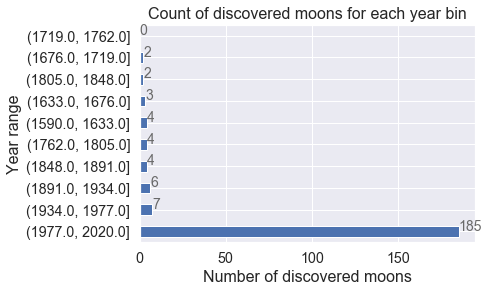

In [281]:
#plot the bar graph
import matplotlib.pyplot as plt
import seaborn as sns

ax = df['Year bin'].value_counts().plot(kind='barh', rot=0)                                  
ax.set_title("Count of discovered moons for each year bin", fontsize=16)
ax.set_xlabel("Number of discovered moons", fontsize=16)
ax.set_ylabel("Year range", fontsize=16)


# set individual bar lables using above list
for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=14, color='dimgrey')


From the bar chart we can see most of the moons were discovered from the time period 1977-2020, which supports the results found above.